In [1]:
% matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from datetime import date

import matplotlib.pyplot as plt
import pickle

In [3]:
plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
plt.rcParams['font.size'] = 12 #フォントサイズを設定 default : 12

In [4]:
CSV_DIR = "csv"
TARGET_YEAR = 2018

In [5]:
df = pickle.load(open('merged_data.pkl', 'rb'))

In [6]:
df.head()

,name,sex,prize,hair,debut_weight,race_count,win_count,birth_date_from_beginning_of_year,crop_win_count,crop_grade_horse_count,...,name_breeder,win_count_breeder,prize_breeder,name_sire,win_ratio,earning_index,prize_sire,name_bms,win_ratio_bms,earning_index_bms
0,ラッキーライラック,牝,20460.6,栗毛,480.0,5,4,92,7.0,1.0,...,ノーザンファーム,184.0,445896.6,オルフェーヴル,0.139,1.23,1781.8,Flower Alley,1.000,18.62
1,アーモンドアイ,牝,17595.8,鹿毛,472.0,4,3,68,10.0,1.0,...,ノーザンファーム,184.0,445896.6,ロードカナロア,0.198,1.37,1482.4,サンデーサイレンス,0.159,1.26
2,エポカドーロ,牡,17421.2,黒鹿毛,484.0,5,3,45,11.0,1.0,...,田上徹,4.0,18126.2,オルフェーヴル,0.139,1.23,1781.8,フォーティナイナー,0.203,2.02
3,ダノンプレミアム,牡,16651.3,青鹿毛,476.0,4,4,92,7.0,1.0,...,ケイアイファーム,9.0,26639.7,ディープインパクト,0.197,1.87,1860.3,Intikhab,0.200,6.02
4,ステルヴィオ,牡,13669.0,鹿毛,462.0,6,3,14,5.0,1.0,...,ノーザンファーム,184.0,445896.6,ロードカナロア,0.198,1.37,1482.4,ファルブラヴ,0.346,2.61


In [7]:
df.head()

,name,sex,prize,hair,debut_weight,race_count,win_count,birth_date_from_beginning_of_year,crop_win_count,crop_grade_horse_count,...,name_breeder,win_count_breeder,prize_breeder,name_sire,win_ratio,earning_index,prize_sire,name_bms,win_ratio_bms,earning_index_bms
0,ラッキーライラック,牝,20460.6,栗毛,480.0,5,4,92,7.0,1.0,...,ノーザンファーム,184.0,445896.6,オルフェーヴル,0.139,1.23,1781.8,Flower Alley,1.000,18.62
1,アーモンドアイ,牝,17595.8,鹿毛,472.0,4,3,68,10.0,1.0,...,ノーザンファーム,184.0,445896.6,ロードカナロア,0.198,1.37,1482.4,サンデーサイレンス,0.159,1.26
2,エポカドーロ,牡,17421.2,黒鹿毛,484.0,5,3,45,11.0,1.0,...,田上徹,4.0,18126.2,オルフェーヴル,0.139,1.23,1781.8,フォーティナイナー,0.203,2.02
3,ダノンプレミアム,牡,16651.3,青鹿毛,476.0,4,4,92,7.0,1.0,...,ケイアイファーム,9.0,26639.7,ディープインパクト,0.197,1.87,1860.3,Intikhab,0.200,6.02
4,ステルヴィオ,牡,13669.0,鹿毛,462.0,6,3,14,5.0,1.0,...,ノーザンファーム,184.0,445896.6,ロードカナロア,0.198,1.37,1482.4,ファルブラヴ,0.346,2.61


In [8]:
def show_mean_cv_plot(col, size=(12, 8), xlim=None):
    gx = df.groupby([col])['prize'].mean()
    gy = df.groupby([col])['prize'].std() / df.groupby([col])['prize'].mean() # coefficient of variation (CV)

    if size:
        plt.figure(figsize=size)
    if xlim:
        plt.xlim(xlim)
    plt.scatter(gx, gy)

    for i, txt in enumerate(df.groupby([col])['prize'].count().index): 
        plt.annotate(txt, (gx[i],gy[i]), textcoords=('offset pixels', 'offset pixels'), xytext=(2, 2))

#### 性別

In [11]:
df.sex.value_counts()

牡    1980
牝    1871
セ      72
Name: sex, dtype: int64

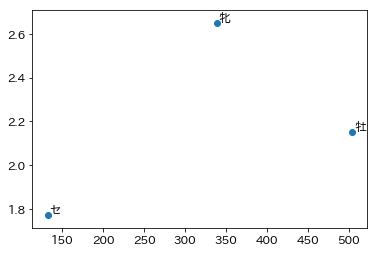

In [12]:
show_mean_cv_plot('sex', size=(6, 4))

#### 毛色

In [13]:
df.hair.value_counts()

鹿毛     1605
栗毛      932
黒鹿毛     828
青鹿毛     312
芦毛      183
青毛       50
栃栗毛      12
白毛        1
Name: hair, dtype: int64

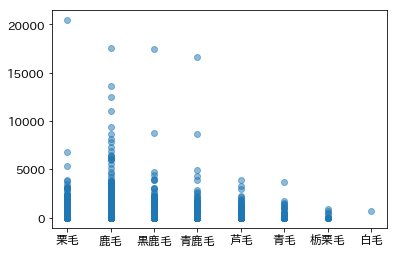

In [14]:
plt.scatter(df.hair, df.prize, alpha=0.5)

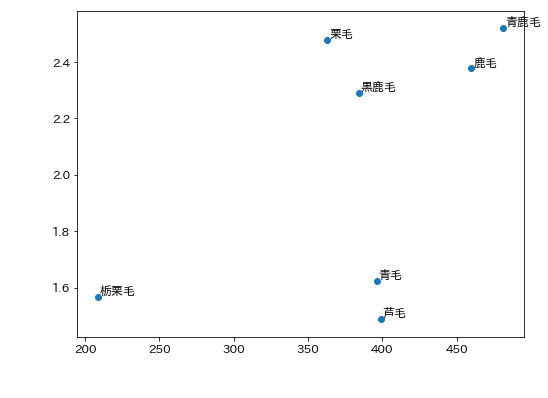

In [15]:
show_mean_cv_plot('hair', size=(8, 6))

#### 種牡馬

In [16]:
df_sire = pd.read_csv(f'{CSV_DIR}/sire_leading.{TARGET_YEAR}.csv', index_col=[0])

In [17]:
top_sires = df_sire['name'].values[:15]
top_sires

array(['ディープインパクト', 'ハーツクライ', 'キングカメハメハ', 'ステイゴールド', 'ダイワメジャー', 'ハービンジャー',
       'クロフネ', 'ルーラーシップ', 'ロードカナロア', 'マンハッタンカフェ', 'エンパイアメーカー',
       'キンシャサノキセキ', 'オルフェーヴル', 'アドマイヤムーン', 'ゴールドアリュール'], dtype=object)

In [18]:
df['name_sire'] = df['name_sire'].map(lambda x: x if x in top_sires else "Other")

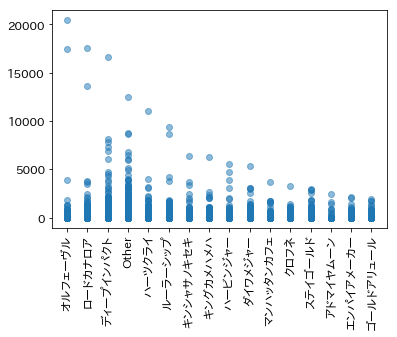

In [19]:
plt.xticks(rotation=90)
plt.scatter(df.name_sire, df.prize, alpha=0.5)

In [20]:
df.name_sire.value_counts()

Other        2622
ディープインパクト     145
ハーツクライ        134
ロードカナロア       131
オルフェーヴル       121
ルーラーシップ       117
キングカメハメハ       85
ステイゴールド        79
ダイワメジャー        76
ゴールドアリュール      74
ハービンジャー        68
クロフネ           62
キンシャサノキセキ      61
エンパイアメーカー      57
マンハッタンカフェ      48
アドマイヤムーン       43
Name: name_sire, dtype: int64

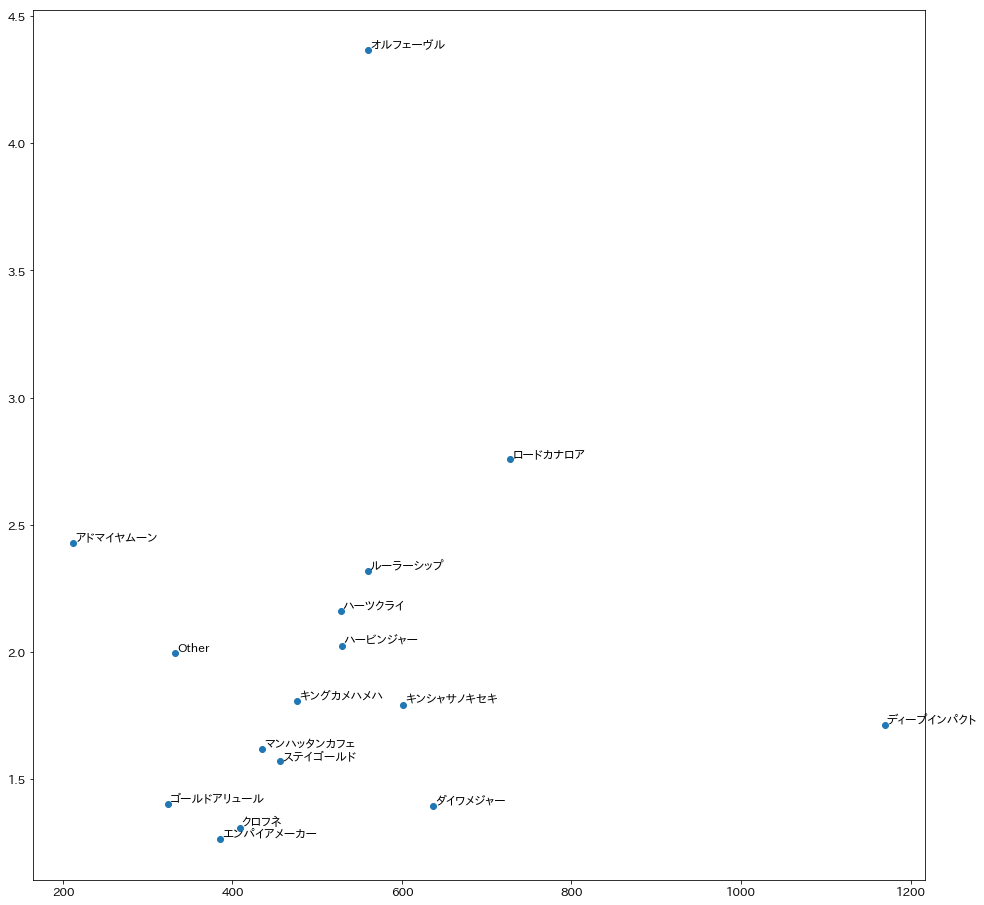

In [21]:
show_mean_cv_plot('name_sire', size=(16, 16))

#### BMS

In [22]:
df_bms = pd.read_csv(f'{CSV_DIR}/bms_leading.{TARGET_YEAR}.csv', index_col=[0])

In [23]:
top_bmss = df_bms['name'].values[:15]
top_bmss

array(['サンデーサイレンス', 'アグネスタキオン', 'クロフネ', 'ダンスインザダーク', 'ブライアンズタイム',
       'キングカメハメハ', 'フジキセキ', 'フレンチデピュティ', 'シンボリクリスエス', 'フォーティナイナー',
       'スペシャルウィーク', 'トニービン', 'Storm Cat', "Unbridled's Song", 'ホワイトマズル'],
      dtype=object)

In [24]:
df['name_bms'] = df['name_bms'].map(lambda x: x if x in top_bmss else "Other")

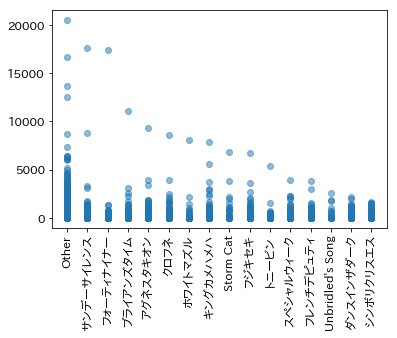

In [25]:
plt.xticks(rotation=90)
plt.scatter(df.name_bms, df.prize, alpha=0.5)

In [26]:
df.name_bms.value_counts()

Other               2622
サンデーサイレンス            198
アグネスタキオン             143
フジキセキ                127
クロフネ                 107
ブライアンズタイム            101
ダンスインザダーク            100
キングカメハメハ              98
スペシャルウィーク             88
シンボリクリスエス             88
フレンチデピュティ             88
フォーティナイナー             42
ホワイトマズル               36
トニービン                 33
Storm Cat             32
Unbridled's Song      20
Name: name_bms, dtype: int64

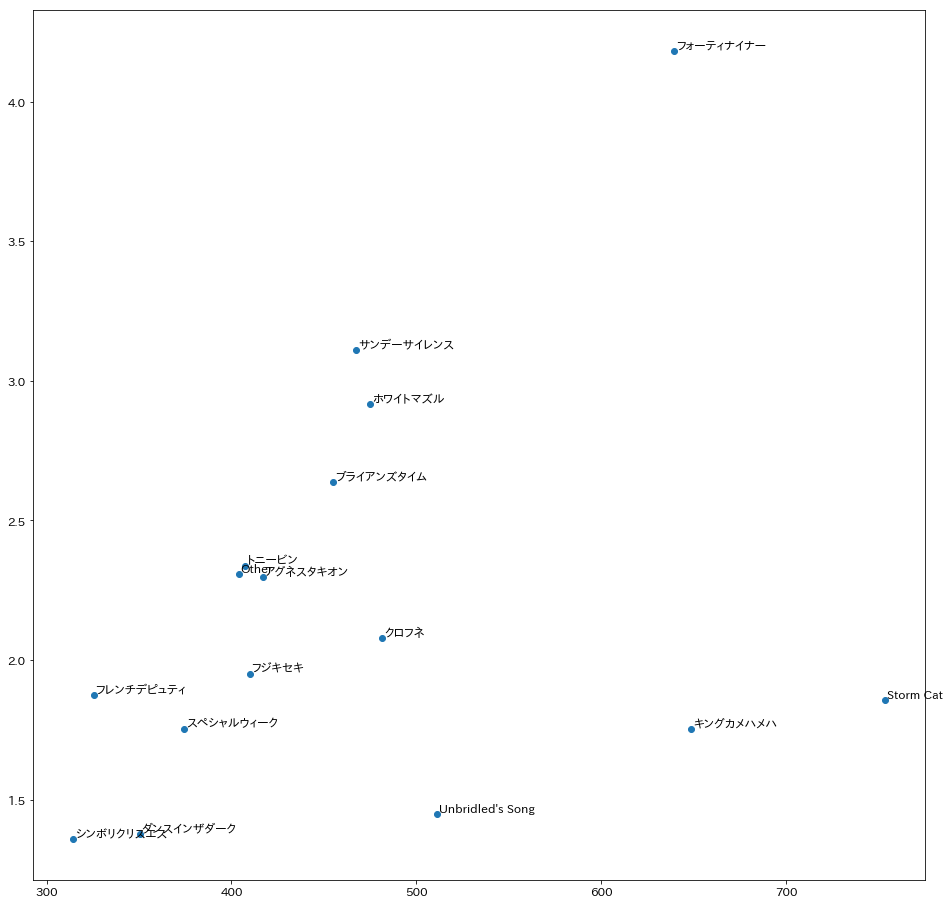

In [27]:
show_mean_cv_plot('name_bms', size=(16, 16))

#### 母産駒勝利数

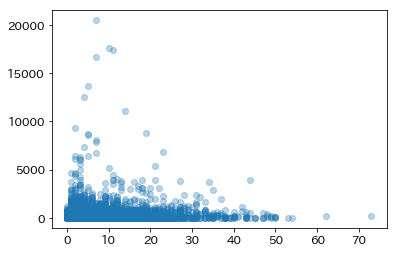

In [28]:
plt.scatter(df.crop_win_count, df.prize, alpha=0.3)

#### 調教師

In [29]:
df_trainer = pd.read_csv(f'{CSV_DIR}/trainer_leading.{TARGET_YEAR}.csv', index_col=[0])

In [30]:
top_trainers = df_trainer['name'].values[:40]
top_trainers

array(['藤原英昭', '角居勝彦', '安田隆行', '矢作芳人', '木村哲也', '南井克巳', '浅見秀一', '中内田充正',
       '大久保龍志', '友道康夫', '藤岡健一', '石坂正', '田村康仁', '今野貞一', '堀宣行', '須貝尚介',
       '高野友和', '音無秀孝', '加藤征弘', '古賀慎明', '高橋義忠', '五十嵐忠男', '国枝栄', '宮本博',
       '庄野靖志', '石橋守', '角田晃一', '萩原清', '中竹和也', '菊川正達', '池江泰寿', '手塚貴久', '昆貢',
       '宗像義忠', '本田優', '松下武士', '藤沢和雄', '菊沢隆徳', '小崎憲', '池添兼雄'], dtype=object)

In [31]:
df['name_trainer'] = df['name_trainer'].map(lambda x: x if x in top_trainers else "Other")

In [32]:
df.name_trainer.value_counts()

Other    2998
矢作芳人       35
安田隆行       34
高橋義忠       30
角居勝彦       30
田村康仁       30
菊沢隆徳       27
松下武士       27
国枝栄        27
須貝尚介       26
加藤征弘       26
石坂正        26
藤原英昭       25
池江泰寿       25
高野友和       24
今野貞一       23
木村哲也       23
石橋守        23
音無秀孝       23
手塚貴久       23
古賀慎明       23
中竹和也       22
小崎憲        22
大久保龍志      22
宗像義忠       22
宮本博        22
角田晃一       21
浅見秀一       21
五十嵐忠男      21
藤岡健一       20
中内田充正      20
堀宣行        20
萩原清        20
菊川正達       20
池添兼雄       19
本田優        19
庄野靖志       18
南井克巳       18
友道康夫       17
藤沢和雄       16
昆貢         15
Name: name_trainer, dtype: int64

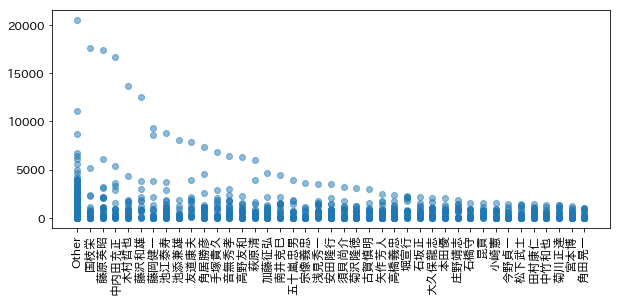

In [33]:
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
plt.scatter(df.name_trainer, df.prize, alpha=0.5)

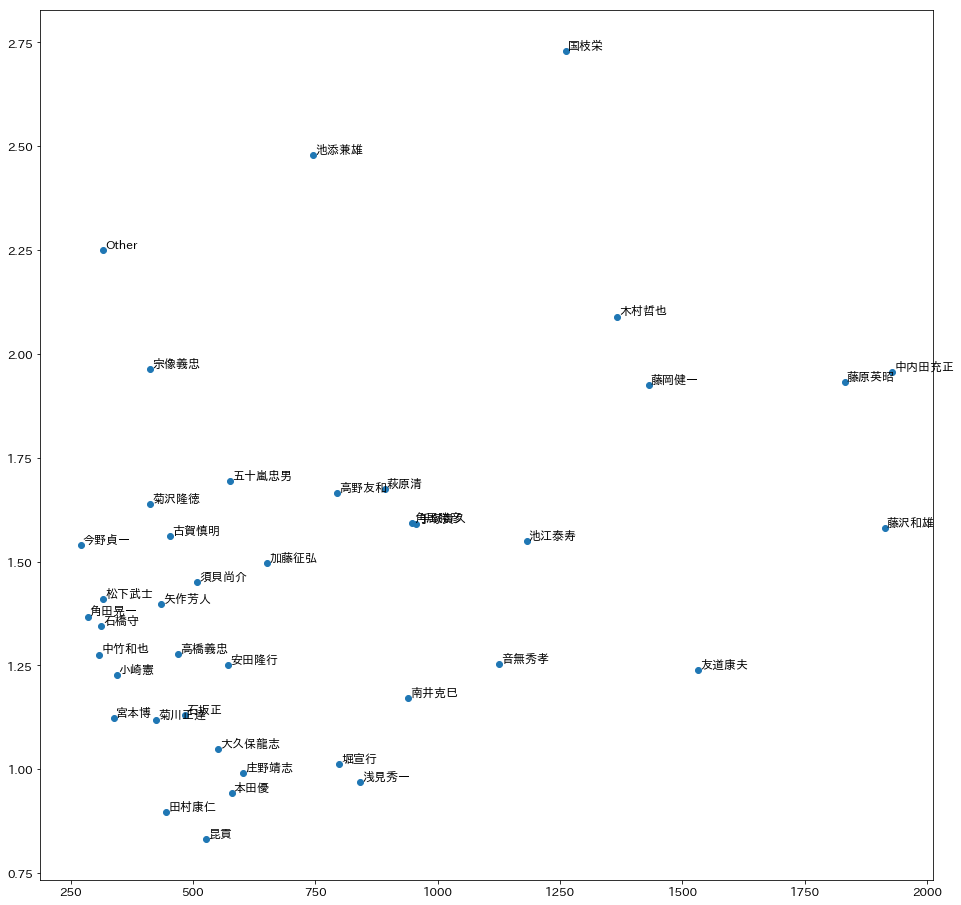

In [34]:
show_mean_cv_plot('name_trainer', size=(16, 16))

###### 勝ち上がり馬の率

In [35]:
def calc_debut_ratio_win_ratio(trainer_name):
    debut_ratio = len(df[(df['name_trainer'] == trainer_name) & (df['race_count'] > 0)]) / float(len(df[df['name_trainer'] == trainer_name]))
    win_ratio = len(df[(df['name_trainer'] == trainer_name) & (df['win_count'] > 0)]) / float(len(df[df['name_trainer'] == trainer_name]))
    return debut_ratio, win_ratio

In [36]:
race_rs = []
win_rs = []

for trainer in top_trainers:
    race_r, win_r = calc_debut_ratio_win_ratio(trainer)
    race_rs.append(race_r)
    win_rs.append(win_r)
    print(trainer, race_r, win_r)

藤原英昭 1.0 0.64
角居勝彦 1.0 0.5666666666666667
安田隆行 1.0 0.47058823529411764
矢作芳人 1.0 0.4
木村哲也 1.0 0.5652173913043478
南井克巳 1.0 0.6111111111111112
浅見秀一 1.0 0.5714285714285714
中内田充正 1.0 0.5
大久保龍志 1.0 0.5
友道康夫 1.0 0.6470588235294118
藤岡健一 1.0 0.4
石坂正 1.0 0.4230769230769231
田村康仁 1.0 0.4
今野貞一 1.0 0.30434782608695654
堀宣行 1.0 0.55
須貝尚介 1.0 0.3076923076923077
高野友和 1.0 0.5
音無秀孝 1.0 0.4782608695652174
加藤征弘 1.0 0.4230769230769231
古賀慎明 1.0 0.34782608695652173
高橋義忠 1.0 0.43333333333333335
五十嵐忠男 1.0 0.38095238095238093
国枝栄 1.0 0.4444444444444444
宮本博 1.0 0.2727272727272727
庄野靖志 1.0 0.5555555555555556
石橋守 1.0 0.21739130434782608
角田晃一 1.0 0.3333333333333333
萩原清 1.0 0.45
中竹和也 1.0 0.3181818181818182
菊川正達 1.0 0.35
池江泰寿 1.0 0.56
手塚貴久 1.0 0.4782608695652174
昆貢 1.0 0.4
宗像義忠 1.0 0.2727272727272727
本田優 1.0 0.47368421052631576
松下武士 1.0 0.18518518518518517
藤沢和雄 1.0 0.75
菊沢隆徳 1.0 0.2962962962962963
小崎憲 1.0 0.36363636363636365
池添兼雄 1.0 0.2631578947368421


In [37]:
np.argsort(win_rs)[::-1]

array([36,  9,  0,  5,  6,  1,  4, 30, 24, 14,  8,  7, 16, 17, 31, 34,  2,
       27, 22, 20, 18, 11,  3, 10, 32, 12, 21, 38, 29, 19, 26, 28, 15, 13,
       37, 23, 33, 39, 25, 35])

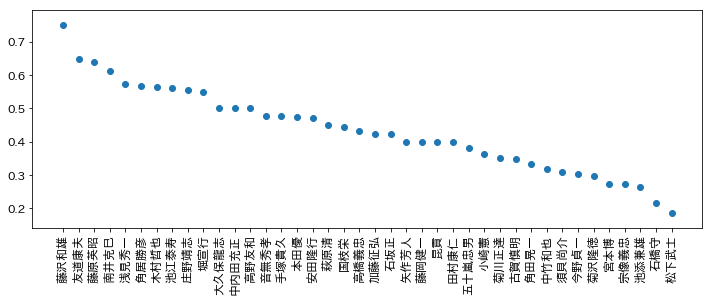

In [38]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=90)
plt.scatter(np.array(top_trainers)[np.argsort(win_rs)[::-1]], np.array(win_rs)[np.argsort(win_rs)[::-1]])

###### 栗東 vs 美浦

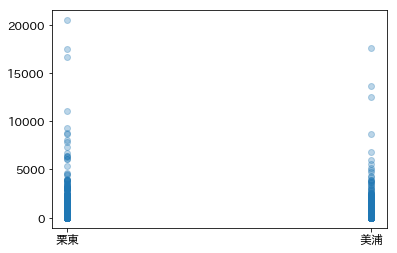

In [40]:
plt.scatter(df.stable_trainer, df.prize, alpha=0.3)

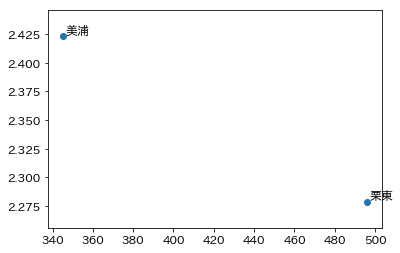

In [41]:
show_mean_cv_plot('stable_trainer', size=(6, 4))

#### 生産者

In [42]:
df_breeder = pd.read_csv(f'{CSV_DIR}/breeder_leading.{TARGET_YEAR}.csv', index_col=[0])

In [43]:
top_breeders = df_breeder['name'].values[:20]
top_breeders

array(['ノーザンファーム', '社台ファーム', '社台コーポレーション白老ファーム', 'ダーレー・ジャパン・ファーム',
       '下河辺牧場', '岡田スタッド', '三嶋牧場', 'ケイアイファーム', 'ノースヒルズ', '千代田牧場', '辻牧場',
       'ビッグレッドファーム', '追分ファーム', 'フジワラファーム', 'コスモヴューファーム', '新冠タガノファーム',
       'レイクヴィラファーム', '田上徹', 'グランド牧場', '坂東牧場'], dtype=object)

In [44]:
df['name_breeder'] = df['name_breeder'].map(lambda x: x if x in top_breeders else "Other")

In [45]:
df.name_breeder.value_counts()

Other               2532
ノーザンファーム             366
社台ファーム               306
社台コーポレーション白老ファーム      95
ダーレー・ジャパン・ファーム        81
千代田牧場                 67
下河辺牧場                 60
岡田スタッド                53
ビッグレッドファーム            53
三嶋牧場                  42
ノースヒルズ                33
新冠タガノファーム             31
コスモヴューファーム            30
追分ファーム                30
フジワラファーム              30
グランド牧場                26
辻牧場                   24
ケイアイファーム              22
レイクヴィラファーム            20
坂東牧場                  18
田上徹                    4
Name: name_breeder, dtype: int64

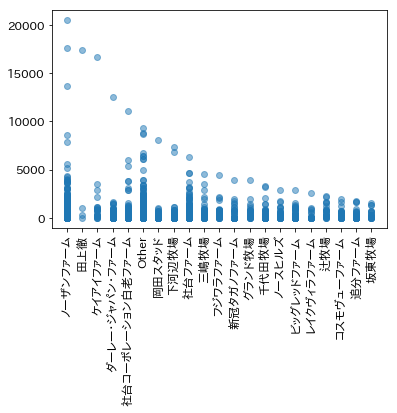

In [46]:
plt.xticks(rotation=90)
plt.scatter(df.name_breeder, df.prize, alpha=0.5)

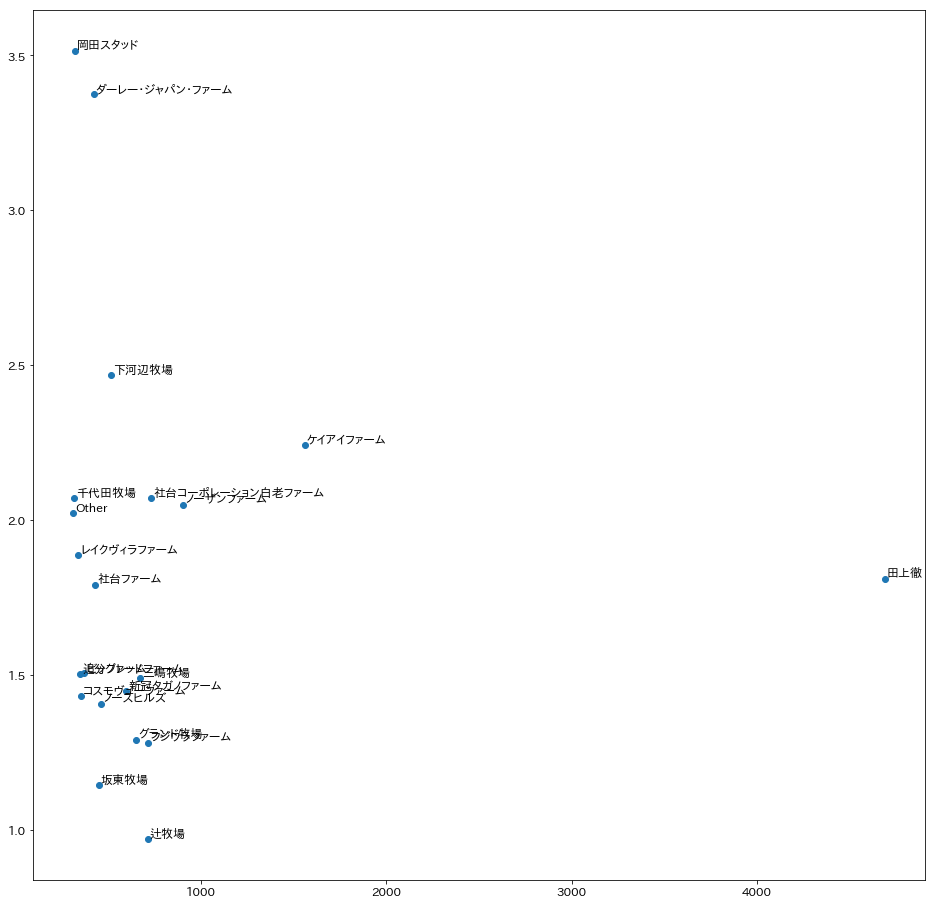

In [47]:
show_mean_cv_plot('name_breeder', size=(16, 16))

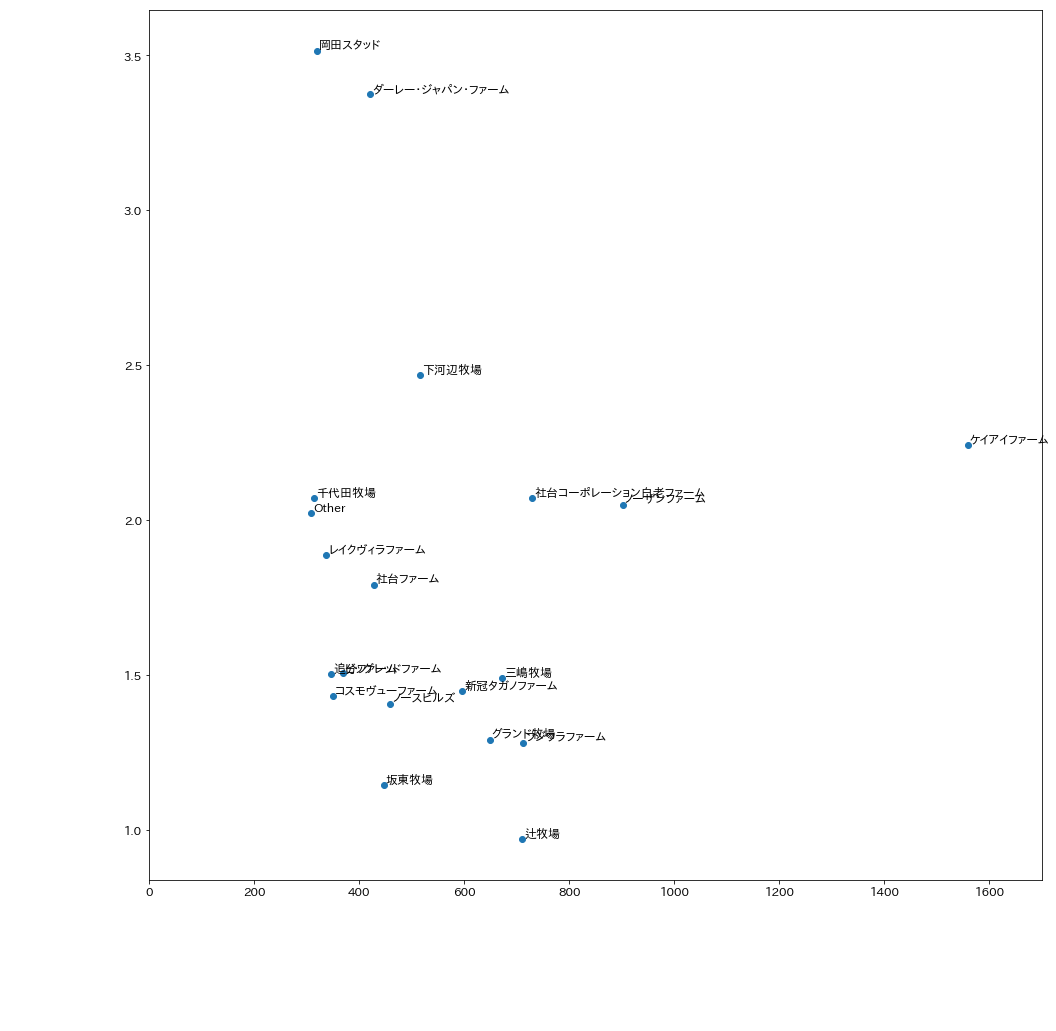

In [48]:
show_mean_cv_plot('name_breeder', xlim=(0, 1700), size=(16, 16))

#### 誕生日

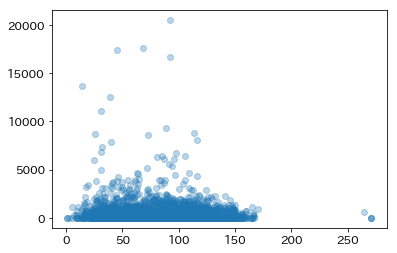

In [49]:
plt.scatter(df.birth_date_from_beginning_of_year, df.prize, alpha=0.3)

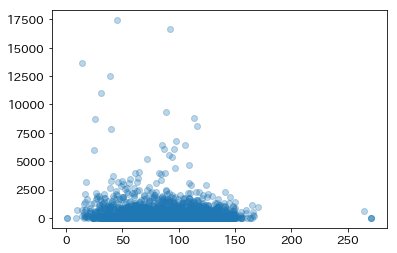

In [19]:
# 牡馬のみ
plt.scatter(df[df['sex'] == '牡']['birth_date_from_beginning_of_year'], df[df['sex'] == '牡']['prize'], alpha=0.3)

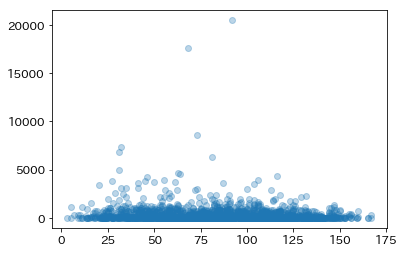

In [18]:
# 牝馬のみ
plt.scatter(df[df['sex'] == '牝']['birth_date_from_beginning_of_year'], df[df['sex'] == '牝']['prize'], alpha=0.3)

#### デビュー時体重

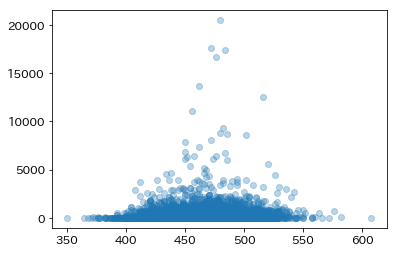

In [50]:
plt.scatter(df.debut_weight, df.prize, alpha=0.3)

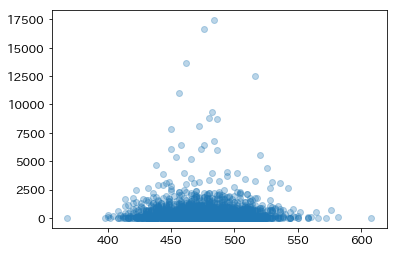

In [21]:
# 牡馬のみ
plt.scatter(df[df['sex'] == '牡']['debut_weight'], df[df['sex'] == '牡']['prize'], alpha=0.3)

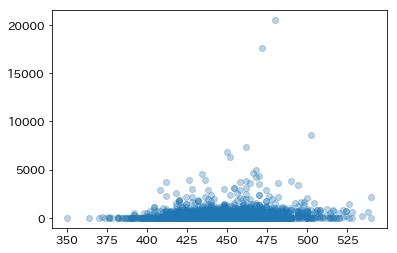

In [22]:
# 牝馬のみ
plt.scatter(df[df['sex'] == '牝']['debut_weight'], df[df['sex'] == '牝']['prize'], alpha=0.3)